In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd /home/ecotner/neural_tsp/notebooks

/home/ecotner/neural_tsp/notebooks


In [3]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from neuraltsp.environments import RandomTSPEnv

In [4]:
env = RandomTSPEnv(5)

In [5]:
env.state

State(locs=tensor([[-1.6306, -0.3892],
        [ 0.0273,  0.2789],
        [ 1.1866, -0.2290],
        [-0.7741, -0.6620],
        [-0.4111, -0.7679]], device=&#39;cuda:0&#39;), dmatrix=tensor([[0.0000, 1.7875, 2.8217, 0.8988, 1.2769],
        [1.7875, 0.0000, 1.2657, 1.2360, 1.1349],
        [2.8217, 1.2657, 0.0000, 2.0080, 1.6862],
        [0.8988, 1.2360, 2.0080, 0.0000, 0.3781],
        [1.2769, 1.1349, 1.6862, 0.3781, 0.0000]], device=&#39;cuda:0&#39;), seq=None, dist=None)

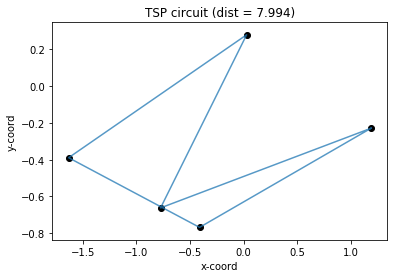

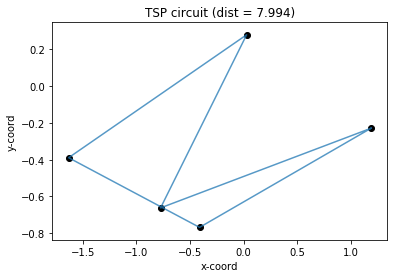

In [6]:
env.step(torch.randn(5).argsort(), kind="re-order");
env.render()

In [14]:
env.state.seq

tensor([2, 3, 0, 1, 4])

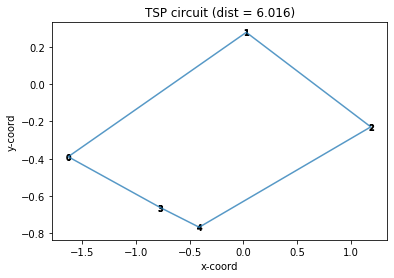

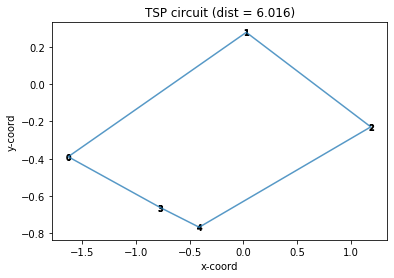

In [15]:
env.step((0, -1), "swap")
env.render(True)

&lt;matplotlib.collections.PathCollection at 0x7f3758756990&gt;

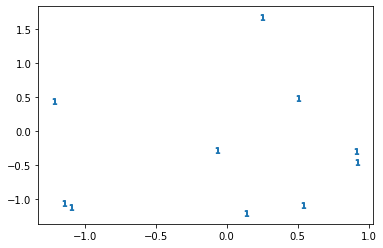

In [11]:
x = np.random.randn(10, 2)
plt.scatter(*x.T, marker="$1$")